Image Basics

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


width: 350 pixels
height: 228 pixels
Pixel - Red: 222, Green: 229, Blue: 239


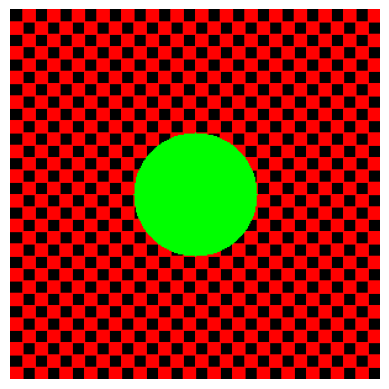

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from lib.helper import draw
#plt.plot([1, 2, 3, 4, 4])
#plt.ylabel('Numbers')
#plt.show()

# Load the image and show some basic information on it
image = cv2.imread("../data/trex.png")
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
# print("channels: {}".format(image.shape[2]))
# image = mpimg.imread("../data/trex.png")
# plt.axis("off")
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()


# Show the image and wait for a keypress
#cv2.imshow("Image", image)
#cv2.waitKey(0)

# cv2.imwrite("newimage.jpg", image)

# access & manipulate pixels
(b, g, r) = image[219, 90]
print("Pixel - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# corner = image[0:100, 0:100]
# plt.axis("off")
# plt.imshow(cv2.cvtColor(corner, cv2.COLOR_BGR2RGB))
# plt.show()

# image[0:100, 0:100] = (0, 255, 0)
# plt.axis("off")
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()

# draw line, rectangle and circle
canvas = np.zeros((300, 300, 3), dtype = "uint8")
green = (0, 255, 0)
red = (0, 0, 255)
blue = (255, 0, 0)
white = (255, 255, 255)

# cv2.line(canvas, (0, 0), (300, 300), green)
# cv2.line(canvas, (300, 0), (0, 300), red, 3)
# cv2.rectangle(canvas, (10, 10), (60, 60), green)
# cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
# cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
# (centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
# for r in range(0, 175, 25):
#     cv2.circle(canvas, (centerX, centerY), r, white)

# abstract drawing
# for i in range(0, 25):
#     radius = np.random.randint(5, high = 200)
#     color = np.random.randint(0, high = 256, size = (3, )).tolist()
#     pt = np.random.randint(0, high = 300, size = (2, ))
#     cv2.circle(canvas, tuple(pt), radius, color, -1)

for i in range(0, 300, 20):
    for j in range (10, 300, 20):
        cv2.rectangle(canvas, (j, i), (j + 10, i + 10), red, -1)

for i in range(10, 300, 20):
    for j in range (0, 300, 20):
        cv2.rectangle(canvas, (j, i), (j + 10, i + 10), red, -1)

center = (canvas.shape[1] // 2, canvas.shape[0] // 2)
cv2.circle(canvas, center, 50, green, -1)
draw("", canvas)


Practice of image processing methods: translation, rotation, resize, flipping, cropping, addition & subtraction, bitwise operation

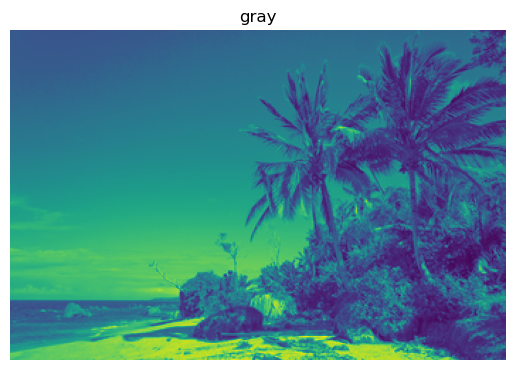

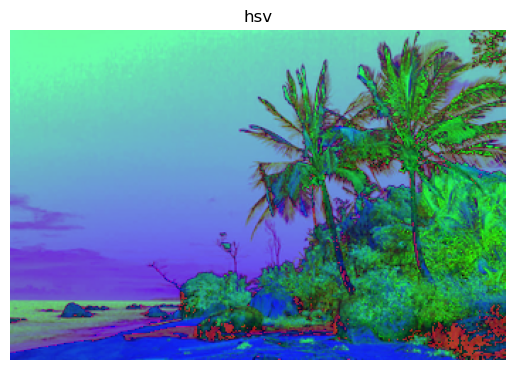

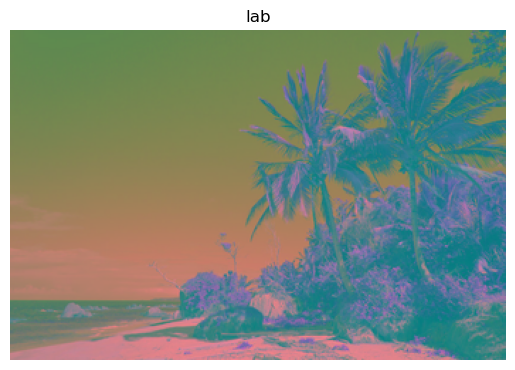

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lib.helper import draw

image = cv2.imread("../data/beach.png")
# M = np.float32([[1, 0, 25], [0, 1, 50]])
# shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
# shifted = imutils.translate(image, 0, 100)
# rotated = imutils.rotate(image, -45)
# resized = imutils.resize(image, width = 150)
# flipped = cv2.flip(image, 0)

# M = np.ones(image.shape, dtype = "uint8") * 100
# added = cv2.add(image, M)

# plt.axis("off")
# plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
# plt.show()

# M = np.ones(image.shape, dtype = "uint8") * 50
# subtracted = cv2.subtract(image, M)

# plt.axis("off")
# plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
# plt.show()

# rectangle = np.zeros((300, 300), dtype = "uint8")
# cv2.rectangle(rectangle, (25, 25), (275, 275), 255 , -1)
# imutils.draw(rectangle, True)

# circle = np.zeros((300, 300), dtype = "uint8")
# cv2.circle(circle, (150, 150), 150, 255, -1)
# imutils.draw(circle, True)

# bitwiseAnd = cv2.bitwise_and(rectangle, circle)
# imutils.draw(bitwiseAnd, True)

# bitwiseOr = cv2.bitwise_or(rectangle, circle)
# imutils.draw(bitwiseOr, True)

# bitwiseXor = cv2.bitwise_xor(rectangle, circle)
# imutils.draw(bitwiseXor, True)

# bitwiseNot = cv2.bitwise_not(circle)
# imutils.draw(bitwiseNot, True)

# mask = np.zeros(image.shape[:2], dtype = "uint8")
# (cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
# cv2.circle(mask, (cX, cY), 100, 255, -1)
# masked = cv2.bitwise_and(image, image, mask = mask)
# imutils.draw(image, True)
# imutils.draw(mask, True)
# imutils.draw(masked, True)

# (B, G, R) = cv2.split(image)
# merged = cv2.merge([B, G, R])
# imutils.draw(R, True)
# imutils.draw(G, True)
# imutils.draw(B, True)
# imutils.draw(merged, True)

# zeros = np.zeros(image.shape[:2], dtype= "uint8")
# imutils.draw(cv2.merge([zeros, zeros, R]), True)
# imutils.draw(cv2.merge([zeros, G, zeros]), True)
# imutils.draw(cv2.merge([B, zeros, zeros]), True)

draw("gray", cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), False)
draw("hsv", cv2.cvtColor(image, cv2.COLOR_BGR2HSV), False)
draw("lab", cv2.cvtColor(image, cv2.COLOR_BGR2LAB), False)


Color Quantization

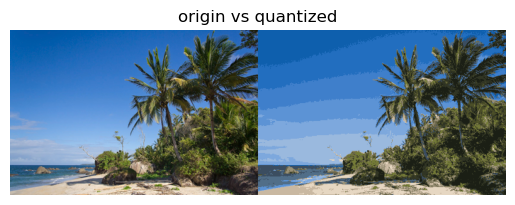

In [3]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import cv2
from lib.helper import draw

image = cv2.imread("../data/beach.png")
(h, w) = image.shape[:2]
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))

# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 16)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

draw("origin vs quantized", np.hstack([image, quant]))